# Τεχνικές Eξόρυξης Δεδομένων - Άσκηση 1
_Βαργιάμης Μιχαήλ, sdi1300018_

---

In [1]:
import itertools
import pandas as pd

In [2]:
netflix_titles = "netflix_titles.csv"
imdb_movies = "IMDb movies.csv"
imdb_ratings = "IMDb ratings.csv"

In [3]:
df1 = pd.read_csv(netflix_titles)
df2 = pd.read_csv(imdb_movies, low_memory=False)
df3 = pd.read_csv(imdb_ratings)

In [4]:
def replace_nan(df):
    for i in df.columns:
        df[i] = df[i].fillna("None")

In [5]:
replace_nan(df1)
replace_nan(df2)
replace_nan(df3)

In [6]:
# Use a subset of the actual dataset
df1 = df1.head(1000)

### Ερώτημα 1

Όπως φαίνεται παρακάτω, οι ταινίες υπερτερούν των σειρών.

In [7]:
print(df1.type.value_counts())

Movie      746
TV Show    254
Name: type, dtype: int64


### Ερώτημα 2

Όπως φαίνεται παρακάτω, τα τελευταία χρόνια (από το 2015 και μετά), το Netflix  επενδύει περισσότερο σε ταινίες από οτι σε σειρές.

In [8]:
# print(df1.query('release_year > 2015').type.describe())
print(df1.query('release_year > 2015').type.value_counts())

Movie      441
TV Show    197
Name: type, dtype: int64


### Ερώτημα 3

Τα παρακάτω δεδομένα δείχνουν για κάθε χώρα, τον αριθμό του περιεχομένου της, όταν αυτός ειναι μεγαλύτερος του 2.

In [9]:
vc = df1.country.value_counts()
print(vc[vc > 2])

United States                    328
India                            133
None                              54
United Kingdom                    40
Japan                             35
Canada                            25
South Korea                       19
Turkey                            17
Taiwan                            16
Spain                             16
Germany                           15
Egypt                             15
France                            13
United States, Canada             13
Brazil                            11
Thailand                          11
Philippines                       10
Australia                         10
Mexico                             9
Nigeria                            8
Indonesia                          8
United Kingdom, United States      7
Argentina                          6
Italy                              6
Colombia                           5
United States, United Kingdom      5
Canada, United States              4
C

### Ερώτημα 4

In [10]:
df0 = pd.DataFrame(columns = ['country', 'listed_in'])
for country, genre in zip(df1.country, df1.listed_in):
    countries = [s.strip() for s in country.split(',')]
    genres = [s.strip() for s in genre.split(',')]
    for c, g in itertools.product(countries, genres):
        temp = {'country': c, 'listed_in': g}
        df0 = df0.append(temp, ignore_index=True)

df0.groupby("country").listed_in.unique()

country
Algeria                    [Classic Movies, Dramas, International Movies]
Argentina               [Action & Adventure, Comedies, International M...
Armenia                             [Documentaries, International Movies]
Australia               [Docuseries, International TV Shows, Science &...
Austria                 [Dramas, Independent Movies, International Mov...
                                              ...                        
United Arab Emirates    [Dramas, Thrillers, International Movies, Sci-...
United Kingdom          [Sports Movies, British TV Shows, Internationa...
United States           [Action & Adventure, Independent Movies, Sci-F...
Uruguay                 [Dramas, International Movies, Comedies, Docum...
Vietnam                 [Action & Adventure, Comedies, International M...
Name: listed_in, Length: 69, dtype: object

### Ερώτημα 5

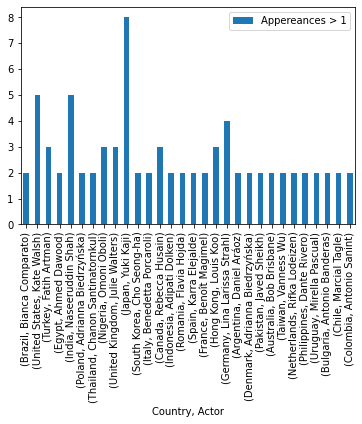

In [11]:
# For this question, no distinction were made between Movies and Tv Series

from collections import Counter

# Create dictionary with all actor appereances for each country
top_actors = {}
for cast, countries in zip(df1.cast, df1.country):
    for country in [s.strip() for s in countries.split(',')]:
        if country not in top_actors:
            top_actors[country] = [s.strip() for s in cast.split(',')]
        else:
            top_actors[country].extend([s.strip() for s in cast.split(',')])


# Create list of tuples ((country, most_famous_actor), appereances)
# for each country
data = []
for country, actor_list in top_actors.items():
    if country == "None":
        continue
    counter = Counter(actor_list)
    most_common = counter.most_common()
    
    if most_common[0][0] != "None" and most_common[0][1] > 1:
        data.append(((country, most_common[0][0]), most_common[0][1]))
    elif most_common[0][0] == "None" and len(most_common) > 1 and most_common[1][1] > 1:
        data.append(((country, most_common[1][0]), most_common[1][1]))

# Import data into a dataframe and plot
df0 = pd.DataFrame(data, columns = ['Country, Actor', 'Appereances > 1'])
df0.plot.bar(x='Country, Actor')   
None

### Ερώτημα 6

Counter({'Mature': 345, 'Teens': 239, 'Older kids': 64, 'Little Kids': 49})
Counter({'Mature': 103, 'Teens': 77, 'Older kids': 37, 'Little Kids': 20})


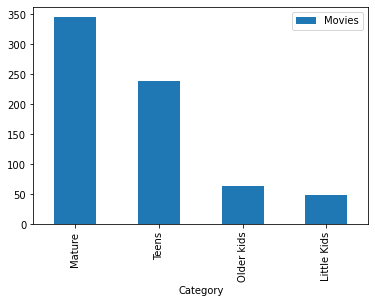

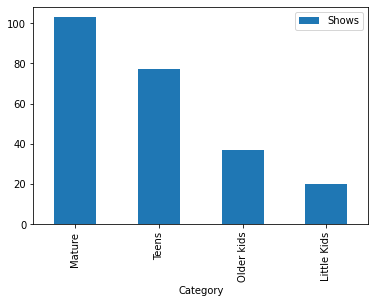

In [12]:
group_names = ["Little Kids","Older kids", "Teens", "Mature" ]
groups = {
    group_names[0]: ["G", "TV-Y", "TV-G"],
    group_names[1]: ["PG, TV-Y7", "TV-Y7-FV", "TV-PG"],
    group_names[2]: ["PG-13", "TV-14"],
    group_names[3]: ["R", "NC-17", "TV-MA"]
}

c_movies = Counter()
c_shows = Counter()
for r, t in zip(df1.rating, df1.type):
    for i in range(len(group_names)):
        if r in groups[group_names[i]]:
            if t == "Movie":
                c_movies[group_names[i]] += 1
            elif t == "TV Show":
                c_shows[group_names[i]] += 1
print(c_movies)
print(c_shows)
df_movies = pd.DataFrame.from_dict(c_movies, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Movies' })
df_shows = pd.DataFrame.from_dict(c_shows, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Shows' })
df_movies.plot.bar(x='Category')   
df_shows.plot.bar(x='Category')   
None

### Ερώτημα 7

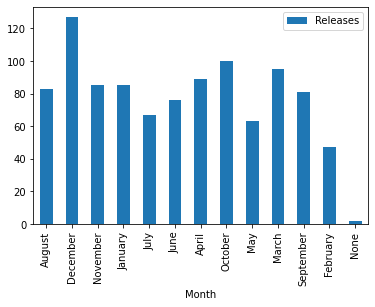

In [13]:
c = Counter()
for d in df1.date_added:
    d = d.split()[0]
    c[d] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Month', 0: 'Releases' })
df0.plot.bar(x='Month')
None

### Ερώτημα 8

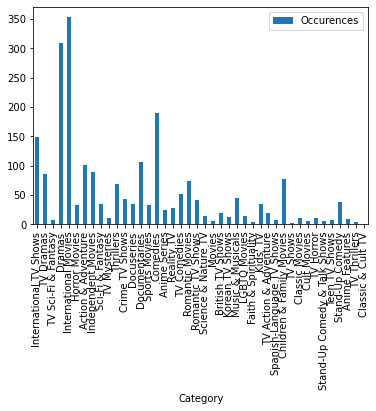

In [14]:
c = Counter()
for category_list in df1.listed_in:
    for category in [s.strip() for s in category_list.split(',')]:
        c[category] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Occurences' })
df0.plot.bar(x='Category')
None

### Ερώτημα 9

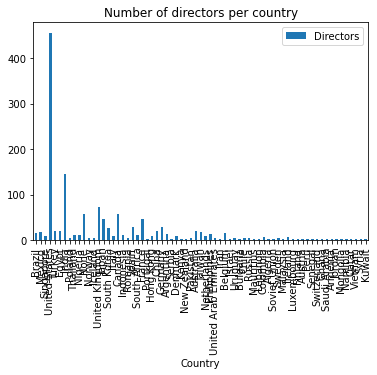

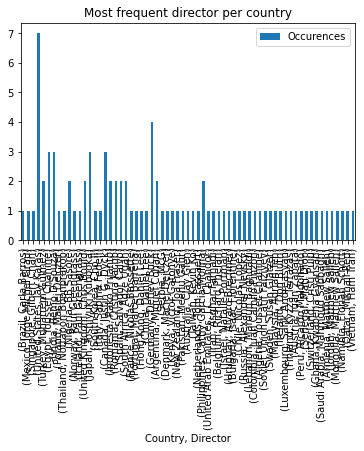

In [15]:
from collections import defaultdict
c = Counter()
directors_per_country = defaultdict(Counter)

for country_list, director_list in zip(df1.country, df1.director):
    for country in [s.strip() for s in country_list.split(',')]:
        for director in [s.strip() for s in director_list.split(',')]:
            c[country] += 1
            directors_per_country[country][director] += 1

data = []
for country, directors in directors_per_country.items():
    if country == "None":
        continue
    if directors.most_common()[0][0] != "None":
        data.append(((country, directors.most_common()[0][0]), directors.most_common()[0][1]))
    else:
        if len(directors) < 2:
            continue
        data.append(((country, directors.most_common()[1][0]), directors.most_common()[1][1]))

df00 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Country', 0: 'Directors' })
df00.plot.bar(x='Country', title="Number of directors per country")
None   
df01 = pd.DataFrame(data, columns = ['Country, Director', 'Occurences'])
df01.plot.bar(x='Country, Director', title="Most frequent director per country")   
None

### Ερώτημα 10

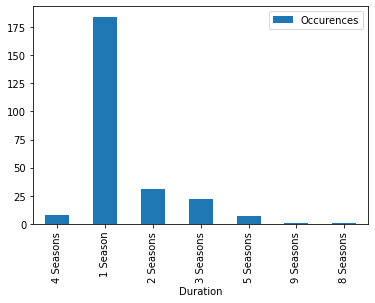

In [16]:
c = Counter()
for type, duration in zip(df1.type, df1.duration):
    if type != "TV Show":
        continue
    c[duration] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Duration', 0: 'Occurences' })
df0.plot.bar(x='Duration')
None

### Ερώτημα 11

In [17]:
top_n = 10

df0 = pd.merge(df2[['imdb_title_id', 'title']], df1[['show_id', 'title']], how='inner', on='title')
df0 = pd.merge(df0, df3[['imdb_title_id', 'weighted_average_vote']], how='inner')

print(df0[['title', 'weighted_average_vote']].sort_values(by='weighted_average_vote', ascending=False)[:top_n])

                             title  weighted_average_vote
350  Ani... Dr. Kashinath Ghanekar                    8.6
19                    Black Friday                    8.5
69              American History X                    8.5
145                       3 Idiots                    8.4
243         Avengers: Infinity War                    8.4
73                 American Beauty                    8.3
338                      Andhadhun                    8.3
146                       2 States                    8.2
138                     Article 15                    8.2
65                 Andaz Apna Apna                    8.2


## Recommendation System

In [18]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [19]:
# Create corpus
corpus = [title + ' ' + description for title, description in zip(df1.title, df1.description)]
print(len(corpus))

1000


In [20]:
# Run this block for test corpus
#corpus = [
#    "an apple a day keeps the doctor away",
#    "mary ate an apple per day day okay",
#    "i don't like apples neither doctors",
#    "who eats apples and not doctors",
#    "two apples a day do not keep doctors away"
#]

In [21]:
# Stem corpus
stemmer = SnowballStemmer("english")
corpus = [' '.join([stemmer.stem(word) for word in sentence.split()]) for sentence in corpus]
#print(corpus, "\n")

### Part 1

In [22]:
# Boolean bag of words
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english', binary=True)
count_vectorizer_vectors = count_vectorizer.fit_transform(corpus)

#print(count_vectorizer.get_feature_names())
#print(count_vectorizer_vectors.toarray())
print(count_vectorizer_vectors.shape)

(1000, 1000)


In [23]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(1,2))
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(corpus)

#print(tfidf_vectorizer.get_feature_names())
#print(tfidf_vectorizer_vectors.toarray())
print(tfidf_vectorizer_vectors.shape)

(1000, 1000)


### Part 2

In [24]:
topk = 10

In [25]:
# Jaccard distance

def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    #X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = 1.0 - intrsct / unions
    return dist

jaccard_distance = pairwise_jaccard(count_vectorizer_vectors).tolist()

In [26]:
jaccard_similar_content = {
    df1.title[i]: [df1.title[j] for j in sorted(range(len(row)), key = lambda j: row[j])[1:topk+1]] 
for i, row in zip(range(len(df1.title)), jaccard_distance)
}

In [27]:
# Cosine distance
from sklearn.metrics import pairwise_distances

cosine_distance = pairwise_distances(X=tfidf_vectorizer_vectors, metric='cosine').tolist()
#print(cosine_distance)

In [28]:
cosine_similar_content = {
    df1.title[i]: [df1.title[j] for j in sorted(range(len(row)), key = lambda j: row[j])[1:topk+1]] 
for i, row in zip(range(len(df1.title)), cosine_distance)
}

### Part 3

In [29]:
def get_similar_movies(title, N=10, method='boolean_bow'):
    methods_available = ['boolean_bow', 'tf_idf']
    
    if method not in methods_available:
        raise ValueError("method not available")
    
    N = N if N < topk else topk
    
    if method == methods_available[0]:
        return jaccard_similar_content[title][:N]
    elif method == methods_available[1]:
        return cosine_similar_content[title][:N]

In [30]:
query_index = 100
query_title = df1.title[query_index]
query_description = df1.description[query_index]
print("QUERY:\n")
print("title:\n\t%s" % query_title)
print("description:\n\t%s\n" % query_description)
print("===============================================")
print("\nBOOLEAN BOW RESULTS:\n")
for title in get_similar_movies(query_title, N=5, method='boolean_bow'):
    print("title:\n\t%s" % title)
    print("description:\n\t%s\n" % df1.description[df1.index[df1.title == title].tolist()[0]])
print("===============================================")
print("\nTF-IDF RESULTS:\n")
for title in get_similar_movies(query_title, N=5, method='tf_idf'):
    print("title:\n\t%s" % title)
    print("description:\n\t%s\n" % df1.description[df1.index[df1.title == title].tolist()[0]])

QUERY:

title:
	3 Idiots
description:
	While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system.


BOOLEAN BOW RESULTS:

title:
	Alexa & Katie
description:
	Alexa is battling cancer. But with her best friend, Katie, by her side, she's also starting high school – and ready for whatever comes next.

title:
	Back to School
description:
	Eager to flaunt their success in front of old bullies and teenage crushes, two best friends spend a wild night at their middle school reunion.

title:
	#FriendButMarried 2
description:
	As Ayu and Ditto finally transition from best friends to newlyweds, a quick pregnancy creates uncertainty for the future of their young marriage.

title:
	Barrio Universitario
description:
	Four friends from a humble technical school compete against the elite students of a prestigious university in a robot-building contest.

title:
	A Go! Go! Cory Carson Summer Camp
description:
	Co

### Part 4

In [31]:
from heapq import heapify, heappush, heappushpop, nlargest
from scipy.spatial import distance

def get_similar_movies2(description, N=10, method='boolean_bow'):

    class TopnHeap():
        def __init__(self, n):
            self.h = []
            self.length = n
            heapify(self.h)

        def add(self, element):
            if len(self.h) < self.length:
                heappush(self.h, element)
            else:
                heappushpop(self.h, element)

        def get_topn(self):
            return nlargest(self.length, self.h)

    methods_available = ['boolean_bow', 'tf_idf']
    
    if method not in methods_available:
        raise ValueError("method not available")
    
    N = N if N < topk else topk
    
    new_corpus = [description]
    new_corpus = [' '.join([stemmer.stem(word) for word in sentence.split()]) for sentence in new_corpus]
    new_corpus = corpus + new_corpus
    
    topn = TopnHeap(N) 
        
    # boolean bow
    if method == methods_available[0]:
        count_vectorizer_vectors2 = count_vectorizer.fit_transform(new_corpus).toarray()
        for i in range(len(corpus)):
            v1 = count_vectorizer_vectors2[-1]
            v2 = count_vectorizer_vectors2[i]
            dist = distance.jaccard(v1, v2)
            topn.add((-dist, i))
        return [df1.title[pair[1]] for pair in topn.get_topn()] 
    
    # tf_idf
    elif method == methods_available[1]:
        tfidf_vectorizer_vectors2 = tfidf_vectorizer.fit_transform(new_corpus).toarray()
        for i in range(len(corpus)):
            v1 = tfidf_vectorizer_vectors2[-1]
            v2 = tfidf_vectorizer_vectors2[i]
            dist = distance.cosine(v1, v2)
            topn.add((-dist, i))
        return [df1.title[pair[1]] for pair in topn.get_topn()]
    

In [32]:
query_description = 'When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence.'
print("QUERY:")
print("description:\n\t%s\n" % query_description)
print("===============================================")
print("\nBOOLEAN BOW RESULTS:\n")
for title in get_similar_movies2(query_title, N=5, method='boolean_bow'):
    print("title:\n\t%s" % title)
    print("description:\n\t%s\n" % df1.description[df1.index[df1.title == title].tolist()[0]])

QUERY:
description:
	When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence.


BOOLEAN BOW RESULTS:

title:
	Blue Mountain State: The Rise of Thadland
description:
	New NFL star Thad buys his old teammates' beloved frat house, renames it Thadland and throws the raunchiest, most debauched party in school history.

title:
	Blue Jay
description:
	Two former high school sweethearts unexpectedly reunite in their old hometown, where they rediscover their magical bond and face a shared regret.

title:
	Blue Jasmine
description:
	The high life leads to high anxiety for a fashionable New York City homemaker in crisis who finds herself forced to live a more modest lifestyle.

title:
	Blue Is the Warmest Color
description:
	Determined to fall in love, 15-year-old Adele is focused on boys. But it's a blue-haired girl she meets on the street who really piques her inte